In [103]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
sns.set()

In [104]:
df = pd.read_csv('data/NADAC__National_Average_Drug_Acquisition_Cost_.csv')

In [105]:
df['Effective_Date'] =  pd.to_datetime(df['Effective_Date'])
recent_df = df[df['Effective_Date'].dt.year == 2019]
recent_df['Drug Name'] = recent_df['NDC Description'].str.split().str.get(0)
recent_df_sorted = recent_df.sort_values('Effective_Date').drop_duplicates(['Drug Name'],keep='last')
top_ndcs = recent_df_sorted.sort_values('NADAC_Per_Unit', ascending= False).head(5)['NDC'].to_list()
test_df = df[df['NDC'].isin(top_ndcs)]
test_df.drop_duplicates(subset="Effective_Date", inplace=True)
test_df['Drug Name'] = test_df['NDC Description'].str.split().str.get(0)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Text(0.5, 1.0, "Yearly Trends in NADAC Per Unit for 2019's Top 5 Highest NADAC Drugs")

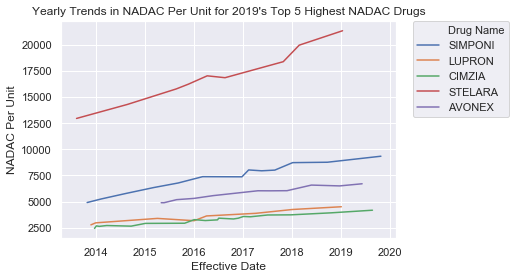

In [106]:
sns.lineplot(x='Effective_Date', y='NADAC_Per_Unit', hue='Drug Name', data=test_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Effective Date')
plt.ylabel('NADAC Per Unit')
plt.title('Yearly Trends in NADAC Per Unit for 2019\'s Top 5 Highest NADAC Drugs')